In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!nvidia-smi

Wed Apr 14 15:58:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    62W / 149W |    124MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/codigo_modelo') # tiene bien la barra

In [5]:
from rot_hamming import rot_hamming
from corr import corr
from gridness_2019 import gridness_2019
from autoc_fast_2D import autoc_fast_2D

In [6]:
from plot_all_grid import plot_all_grid

In [1]:
import tensorflow as tf 
tf.test.gpu_device_name() # para chequear que sea gpu

''

In [7]:
DATA_HOME=r"/content/gdrive/MyDrive/codigo_modelo/"
from pathlib import Path
DATA_HOME = Path(DATA_HOME)

In [8]:
import numpy as np
import time
from scipy import stats

In [9]:
NmECs=10
NIs=15
NmEC = NmECs**2 # cantidad de grid cells. Hay 100 grid cells
vel = 0.6 # velocidad a la que corre la rata (en cm/s)
placeSTD = 7*np.sqrt(vel) # cm, es el ancho de las place cells
s0=0.6
a0=0.1
porcent=int((1-s0)*NmEC)-1
runningAverageWeight = 0.5
un_run=(1-runningAverageWeight)
NI=NIs**2 # es el numero de inputs: tengo 225 place cells
maxWeight= 15/NI
A=2
sigmaW=2
epsilon = 0.00023/vel**(1.5) #constante de aprendizaje
phiSat = 30  # Saturation Phi
b2=vel/placeSTD*0.4 #Speed of fall of activity

In [10]:
cPx=np.arange(0,100,100/NIs)+50/NIs # 100cm es el lado del ambiente cuadrado
cellPositionsX =np.tile(cPx, (NIs, 1))
cellPositionsY=cellPositionsX.transpose()
cellPositionsX=cellPositionsX.ravel(order='F') #.astype(np.float32)
cellPositionsY=cellPositionsY.ravel(order='F') #.astype(np.float32)
# circular W for ring attractor SOLO PARA NUMERO PAR DE GRID CELLS
W0=np.exp(-(np.concatenate(( np.arange(0,NmEC/2,1),np.arange(NmEC/2,0,-1)), axis=None))**2/2/sigmaW**2)
W=np.zeros((NmEC,NmEC))
for jW in range(NmEC):
    W[jW,:]=np.concatenate(( W0[-1-jW+1:],W0[:-1-jW+1]), axis=None)
#W normalization
W=W-np.identity(NmEC)
W=A*W/np.sqrt(sum(W[1,:]**2))
Wautoc=np.zeros((2*NmECs-1,2*NmECs-1))
for i in range(NmEC):
    Wautoc=Wautoc+autoc_fast_2D(np.reshape(W[i,:], (NmECs, NmECs), order="F")).real
Wautoc=Wautoc/NmEC

/content/gdrive/MyDrive/codigo_modelo/autoc_fast_2D.py:15: RuntimeWarning: invalid value encountered in sqrt
  auto=auto/(np.spacing(1)+np.sqrt((signal.fftconvolve(mapp**2, np.rot90(myone, k=2))/nn-mx*mx)*(signal.fftconvolve(myone, np.rot90(mapp**2, k=2))/nn-my*my)))


In [11]:
#parametros simulacion
ms=40 #bins per map. este valor da bins de 2.5 cm, es 100 cm/40 bins = 2.5 cm por bin 
binsize=100/ms
smap=0.05 #running average for map
un_smap=(1-smap)
simdur = 12000000 #tiempo total de la simulacion
pgr = 50000 #12000000-2
cociente=int(simdur/pgr)
# variables para gridness
angbins=np.arange(0,np.pi-0.0001,np.pi/120)
abins=np.arange(-ms+1,ms)
tbins=np.arange(0,len(abins)+0.5,0.5)
rx=np.outer(np.cos(angbins),tbins) # algo en polares
ry=np.outer(np.sin(angbins),tbins)
rx[rx>max(abins)]=np.nan
rx[rx<min(abins)]=np.nan
ry[ry>max(abins)]=np.nan
ry[ry<min(abins)]=np.nan
b=np.exp(1j*angbins*6).reshape(len(angbins),1)     #algo con cualquier fase

Tardo 29.17928171157837 segundos de cálculo
J/W: 5.589669653551282e-05,  r: 0.10000000000000002, rmx: 0.0003539174459436742,  hFF-hRR: -0.09774238250114767, Spar: 0.6677613875416205, FF80%: 0.4053999986185354, RR80%: 0.5031423811196831


/content/gdrive/MyDrive/codigo_modelo/autoc_fast_2D.py:15: RuntimeWarning: invalid value encountered in sqrt
  auto=auto/(np.spacing(1)+np.sqrt((signal.fftconvolve(mapp**2, np.rot90(myone, k=2))/nn-mx*mx)*(signal.fftconvolve(myone, np.rot90(mapp**2, k=2))/nn-my*my)))


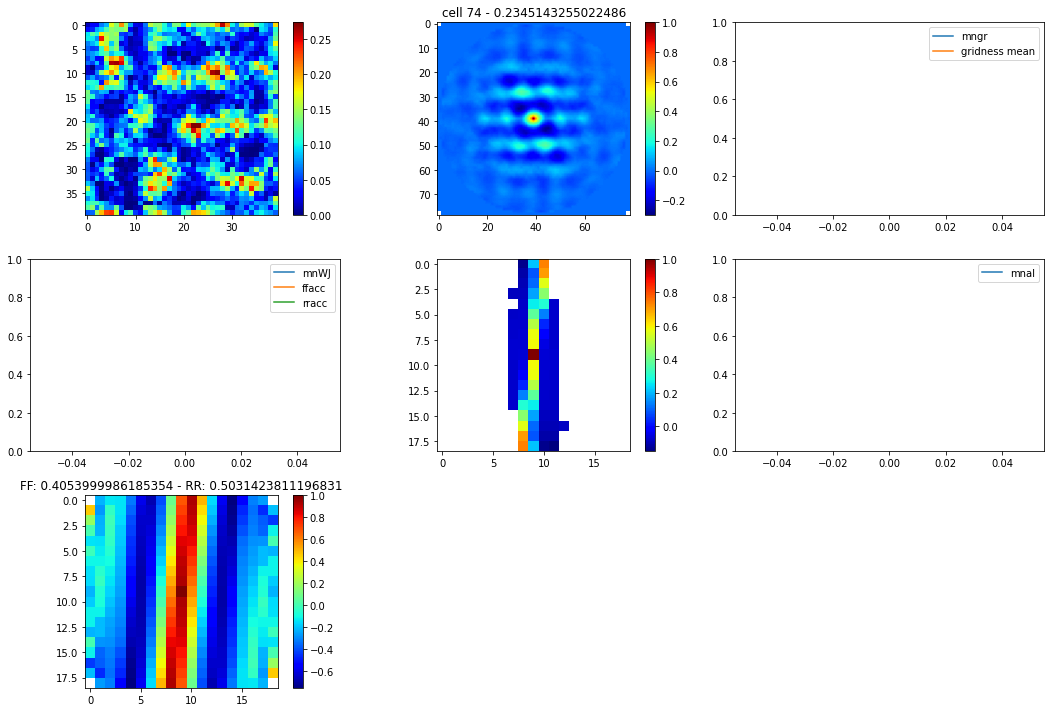

Tardo 2.4267494678497314 segundos de cálculo
Tardo 30.078319549560547 segundos de cálculo
J/W: 0.00010266049068419981,  r: 0.1, rmx: 0.000668025590758656,  hFF-hRR: -0.027103216372100558, Spar: 0.682032044632774, FF80%: 0.4760391647475825, RR80%: 0.5031423811196831


/content/gdrive/MyDrive/codigo_modelo/autoc_fast_2D.py:15: RuntimeWarning: invalid value encountered in sqrt
  auto=auto/(np.spacing(1)+np.sqrt((signal.fftconvolve(mapp**2, np.rot90(myone, k=2))/nn-mx*mx)*(signal.fftconvolve(myone, np.rot90(mapp**2, k=2))/nn-my*my)))


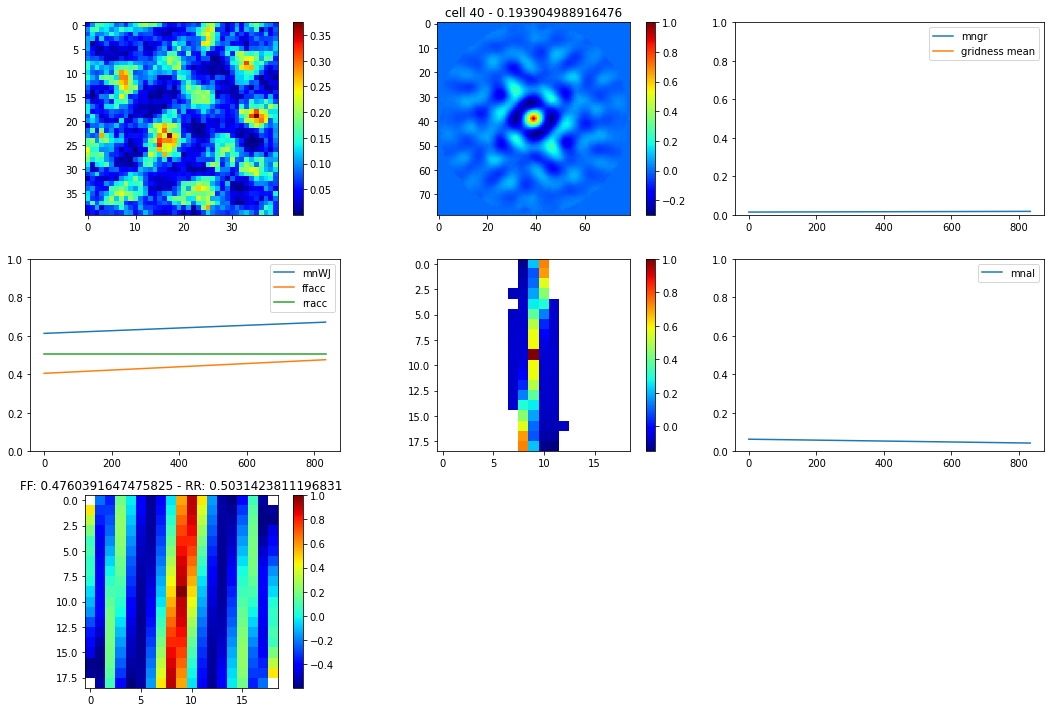

Tardo 2.512320041656494 segundos de cálculo
Tardo 30.310786962509155 segundos de cálculo
J/W: 0.00014743464045838413,  r: 0.10000000000000002, rmx: 0.0012124957534942402,  hFF-hRR: -0.12935926982623325, Spar: 0.6816247890470665, FF80%: 0.3737831112934497, RR80%: 0.503142381119683


/content/gdrive/MyDrive/codigo_modelo/autoc_fast_2D.py:15: RuntimeWarning: invalid value encountered in sqrt
  auto=auto/(np.spacing(1)+np.sqrt((signal.fftconvolve(mapp**2, np.rot90(myone, k=2))/nn-mx*mx)*(signal.fftconvolve(myone, np.rot90(mapp**2, k=2))/nn-my*my)))


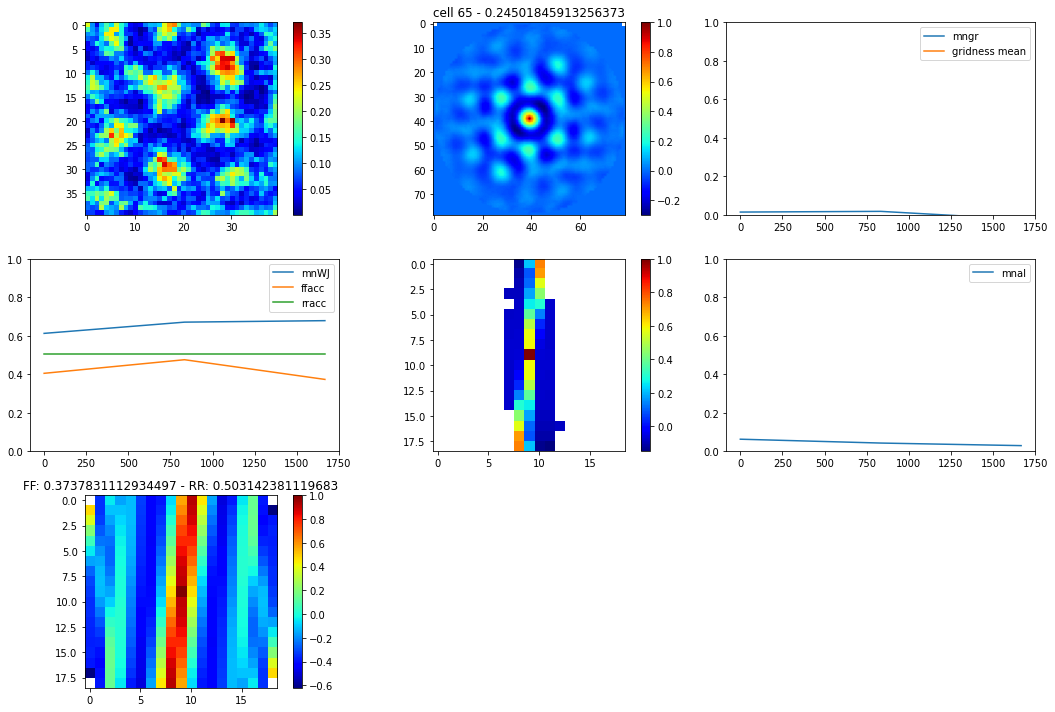

Tardo 2.4102156162261963 segundos de cálculo
Tardo 30.52764344215393 segundos de cálculo
J/W: 0.00019154515086074916,  r: 0.09999999999999998, rmx: 0.0015613060502042554,  hFF-hRR: -0.18175565691604462, Spar: 0.6734780369776818, FF80%: 0.3213867242036384, RR80%: 0.5031423811196831


/content/gdrive/MyDrive/codigo_modelo/autoc_fast_2D.py:15: RuntimeWarning: invalid value encountered in sqrt
  auto=auto/(np.spacing(1)+np.sqrt((signal.fftconvolve(mapp**2, np.rot90(myone, k=2))/nn-mx*mx)*(signal.fftconvolve(myone, np.rot90(mapp**2, k=2))/nn-my*my)))


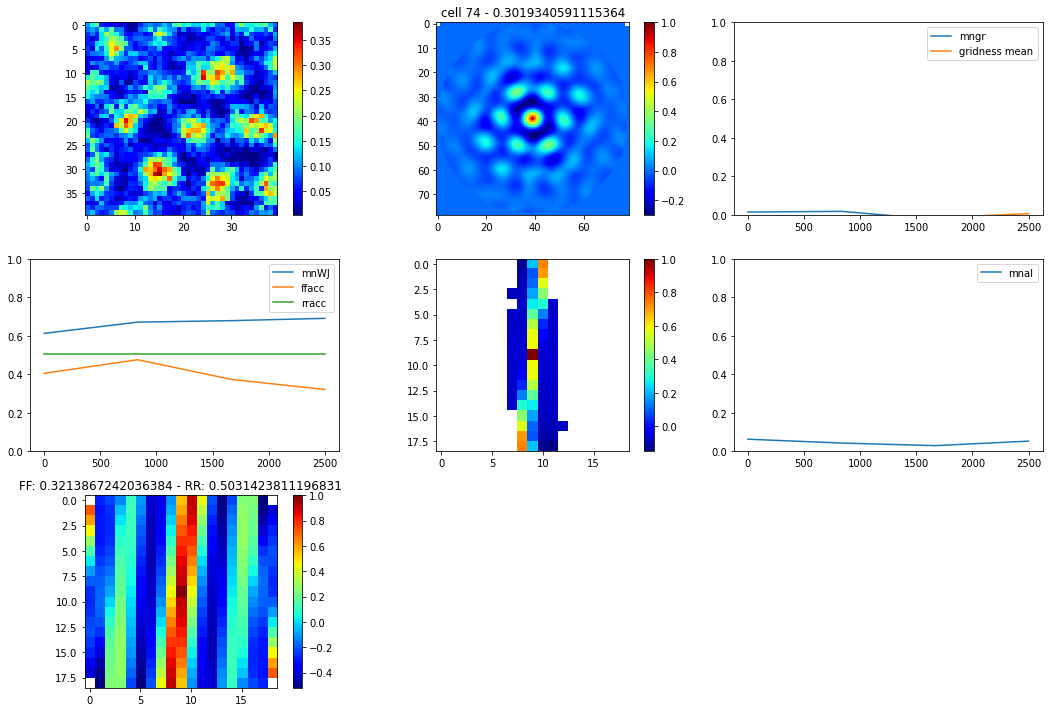

Tardo 2.4036576747894287 segundos de cálculo
Tardo 30.56879234313965 segundos de cálculo
J/W: 0.00023449244178909624,  r: 0.09999999999999998, rmx: 0.001995322636416724,  hFF-hRR: -0.02144715471181284, Spar: 0.6687154092403043, FF80%: 0.48169522640787016, RR80%: 0.5031423811196829


/content/gdrive/MyDrive/codigo_modelo/autoc_fast_2D.py:15: RuntimeWarning: invalid value encountered in sqrt
  auto=auto/(np.spacing(1)+np.sqrt((signal.fftconvolve(mapp**2, np.rot90(myone, k=2))/nn-mx*mx)*(signal.fftconvolve(myone, np.rot90(mapp**2, k=2))/nn-my*my)))


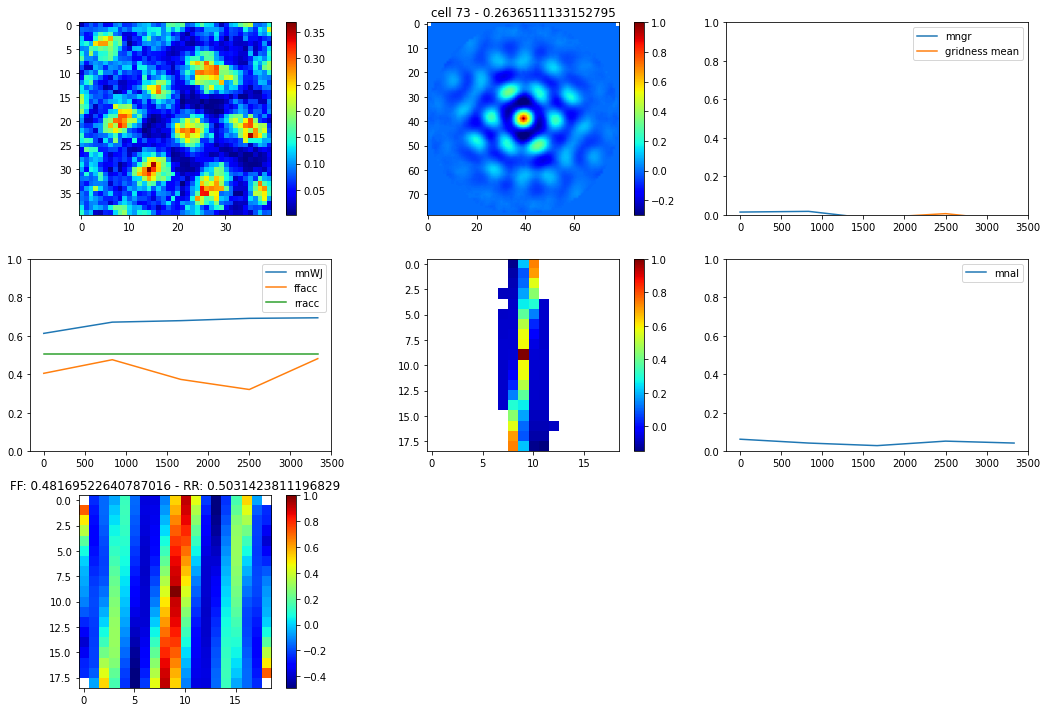

Tardo 2.6091830730438232 segundos de cálculo
Tardo 30.304952383041382 segundos de cálculo
J/W: 0.0002780973555119958,  r: 0.09999999999999998, rmx: 0.0024127467128446803,  hFF-hRR: -0.35122369734806314, Spar: 0.6613690095328635, FF80%: 0.15191868377161988, RR80%: 0.5031423811196831


/content/gdrive/MyDrive/codigo_modelo/autoc_fast_2D.py:15: RuntimeWarning: invalid value encountered in sqrt
  auto=auto/(np.spacing(1)+np.sqrt((signal.fftconvolve(mapp**2, np.rot90(myone, k=2))/nn-mx*mx)*(signal.fftconvolve(myone, np.rot90(mapp**2, k=2))/nn-my*my)))


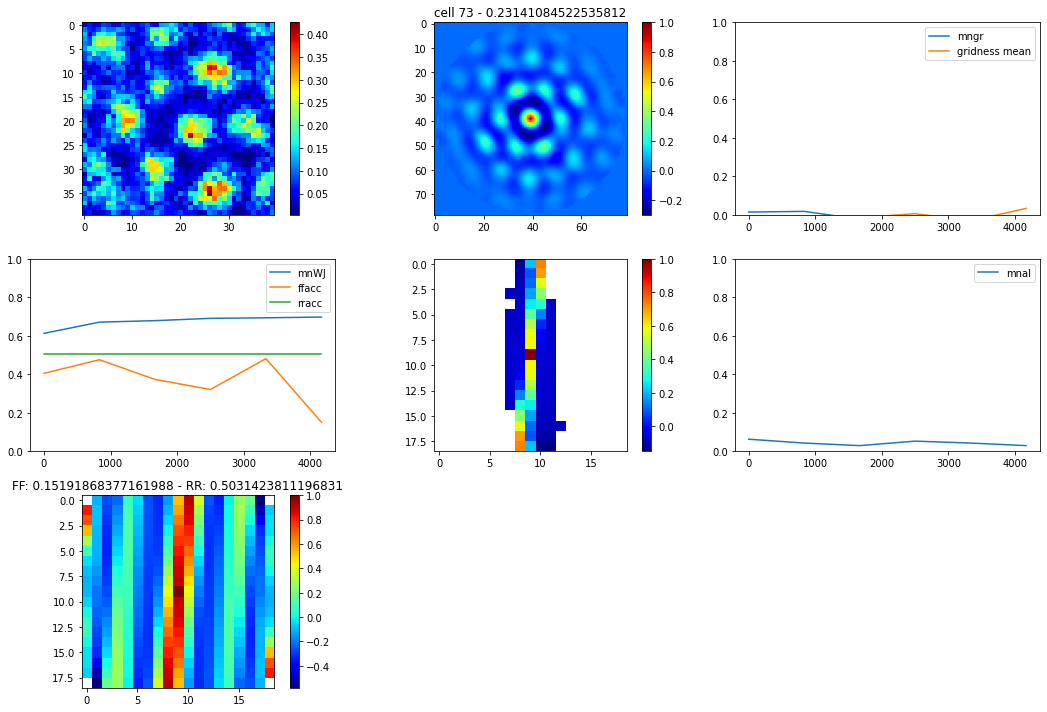

Tardo 2.3646652698516846 segundos de cálculo


KeyboardInterrupt: ignored

In [12]:
for rep in range(1):
    mapp=np.zeros((NmEC,ms*ms)) #.astype(np.float32) # no puede ser np.float32 xq se rompe la funcion corr de scipy
    mymap=np.reshape(mapp[0,:], (ms, ms), order="F")
    rot_ha=rot_hamming(autoc_fast_2D(mymap))
    mngr=np.empty(cociente) # mean gridness vs time  
    mnsp=np.empty(cociente) # mean spacing vs time   
    gridness_mean=np.empty(cociente) # population gridness vs time 
    spacing_mean=np.empty(cociente) # population spacing vs time   
    mnal=np.empty(cociente) #alignment vs time 
    mnWJ=np.empty(cociente) #functional connectivity similar to actual vs time  
    J=np.random.rand(NmEC,NI)
    div=np.sqrt(np.einsum('...i,...i', J, J))
    J=maxWeight*J/div[:,None]
    #simulacion
    start_time = time.time()
    ffacc=np.empty(cociente) 
    rracc=np.empty(cociente)  
    meanJW=0
    mxphi=0
    phi=np.zeros(NmEC) #output
    rec=phi #np.zeros(NmEC) #recurrentes
    r_act=phi #np.zeros(NmEC) #activacion
    r_inact=np.ones(NmEC) #inactivacion
    r=np.zeros(NI) #vector input
    h=np.random.rand(NmEC) #input de place a grid
    meanphi=phi
    meanr=r
    x=np.zeros(simdur) # reemplazar con empty # Posicion X [cm]
    x[0]=50
    y=np.zeros(simdur) # reemplazar con empty
    y[0]=50
    mydir=np.pi/4
    contador=0
    for t in range(1,simdur): #Variable temporal
        mydir=(mydir+0.3*np.random.randn()) 
        x[t]=(x[t-1]+vel*np.cos(mydir))
        y[t]=(y[t-1]+vel*np.sin(mydir))
        while (x[t]<0) or (x[t]>100) or (y[t]<0) or (y[t]>100):
            mydir=(mydir+0.1*np.random.randn())
            x[t]=(x[t-1]+vel*np.cos(mydir))
            y[t]=(y[t-1]+vel*np.sin(mydir))
        #activacion de place cell
        r=phiSat*np.exp(-((x[t]-cellPositionsX)**2+(y[t]-cellPositionsY)**2)/(2*placeSTD**2))
        r_act=(h-r_inact)
        r_inact=(r_inact+b2*r_act)
        #inputs de place cells
        hff=np.dot(J,r) #J@r es mas lento
        #agregar recurrente
        h=(hff+rec)
        #aux=np.sort(r_act) #sorted(list(r_act)) es mas lento
        theta=np.sort(r_act)[porcent] # es int no round, ya lo chequee
        thresholdedActivity =(r_act-theta)*((r_act-theta)>0)
        phi = thresholdedActivity*a0/np.mean(thresholdedActivity)
        meanphi = (meanphi*un_run + runningAverageWeight*phi)
        meanr = (meanr*un_run + runningAverageWeight*r)
        myx=round((x[t]+binsize/2)/binsize)
        myy=round((y[t]+binsize/2)/binsize)
        subind=ms*(myy-1)+myx-1
        mapp[:,subind]=(smap*phi+un_smap*mapp[:,subind])
        #learning
        J = (J + epsilon*(np.outer(phi,r) - np.outer(meanphi,meanr)))
        J[J<0] = 0
        #normalizacion euclidea
        div=np.sqrt(np.einsum('...i,...i', J, J))
        J=maxWeight*J/div[:,None]
        rec=np.dot(W,phi)
        # PLOTS
        if np.mod(t,pgr)==0:
            print('Tardo {} segundos de cálculo'.format((time.time() - start_time)))
            start_time = time.time()
            meanJW=(0.999*meanJW+0.001*J.mean()/W.mean())
            mxphi=(0.999*mxphi+0.001*max(phi))
            ff=np.mean(hff)
            rr=np.mean(rec)
            meanffrr=np.mean(hff-rec)
            map_sparseness=np.mean((mapp.mean(1)**2)/(mapp**2).mean(1))
            print('J/W: ' + str(meanJW) + ',  r: ' + str(np.mean(meanphi)) + ', rmx: ' + str(mxphi) + ',  hFF-hRR: ' + str(meanffrr) + ', Spar: ' + str(map_sparseness) +  ', FF80%: ' + str(ff) + ', RR80%: ' + str(rr) )
            gridness = np.empty(NmEC)
            spacing= np.empty(NmEC) 
            X=np.empty((6,NmEC))
            Y=np.empty((6,NmEC))
            V=np.empty((6,NmEC))
            autocr=np.empty(((ms+ms-1)**2,NmEC))
            mcon=corr(J.transpose(),J.transpose())
            mcon=(mcon-np.identity(mcon.shape[0]))
            Jautoc=np.zeros(2*NmECs-1)
            for i in range(NmEC):
                Jautoc=(Jautoc+autoc_fast_2D(np.reshape(mcon[i,:], (NmECs, NmECs), order="F")).real)   
            Jautoc=Jautoc/NmEC
            for i in range(NmEC):
                mymap=np.reshape(mapp[i,:], (ms, ms), order="F") #.astype(np.float32)
                gridness[i], spacing[i],  X[:,i], Y[:,i], V[:,i], autocr[:,i] = gridness_2019(autoc_fast_2D(mymap),abins,rot_ha,rx,ry,angbins,b,tbins)
            mean_autoc=np.nanmean(autocr,axis=1) # promedio por filas
            gridness_mean[contador], spacing_mean[contador] = gridness_2019(np.reshape(mean_autoc, (2*ms-1, 2*ms-1), order="F"), abins,rot_ha,rx,ry,angbins,b,tbins)[:2] #gridness of the mean autoc
            mngr[contador]=np.nanmean(gridness) 
            mnsp[contador]=np.mean(spacing)
            ffacc[contador]=ff
            rracc[contador]=rr
            aux1=np.delete(mcon, np.arange(0,NmEC**2,NmEC+1), None)
            aux2=np.delete(W, np.arange(0,NmEC**2,NmEC+1), None)
            #mnWJ[contador]=corr(np.reshape(aux1, (len(aux1), 1)), np.reshape(aux2, (len(aux2), 1))) 
            mnWJ[contador]=stats.pearsonr(aux1,aux2)[0]
            hs=np.histogram(np.arctan2(Y.ravel(),X.ravel()), bins=np.arange(-np.pi,16*np.pi/15,np.pi/15))[0]
            hs=np.reshape(hs, (5, 6), order="F")
            hs=np.concatenate((hs[:,0:3], hs[:,1:4], hs[:,2:5], hs[:,3:6]), axis=0)
            mnal[contador]=(max(hs.sum(axis=1))/len(Y.ravel())-1/10)*2
            plot_all_grid(mapp,gridness,X,Y,V,mngr,mnWJ,W,mnal,gridness_mean,pgr,Wautoc,Jautoc,ffacc,rracc,ms,NmEC,ff,rr,contador)
            contador+=1
            print('Tardo {} segundos de cálculo'.format((time.time() - start_time)))
            start_time = time.time()
    np.savez(str(DATA_HOME / '{}'.format(rep)), mngr=mngr, gridness_mean=gridness_mean, mnsp=mnsp, spacing_mean=spacing_mean, ffacc=ffacc, rracc=rracc, J=J, W=W)